<a href="https://colab.research.google.com/github/koc90/part_3_homework_10/blob/main/Hw10_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow import keras
from keras.applications.vgg16 import VGG16
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from keras.datasets import fashion_mnist

In [3]:
(x_train_, y_train), (x_test_, y_test) = fashion_mnist.load_data()
assert x_train_.shape == (60000, 28, 28)
assert x_test_.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)


4422102/4422102 [==============================] - 0s 0us/step


In [4]:
type(x_train_)

numpy.ndarray

In [5]:
x_train = np.zeros(60000*32*32*3)
x_train = x_train.reshape(60000, 32, 32, 3)

x_test = np.zeros(10000*32*32*3)
x_test = x_test.reshape(10000, 32, 32, 3)


In [6]:
for i in range(60000):
  for j in range(3):
    x_train[i,2:30,2:30,j] = x_train_[i,:,:]

In [7]:
for i in range(10000):
  for j in range(3):
    x_test[i,2:30,2:30,j] = x_test_[i,:,:]

In [8]:

fm_label = {
0:	"T-shirt/top",
1:	"Trouser",
2:	"Pullover",
3:	"Dress",
4:	"Coat",
5:	"Sandal",
6:	"Shirt",
7:	"Sneaker",
8:	"Bag",
9:	"Ankle boot"
}

In [9]:

x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [10]:
input_shape = x_train[0].shape
print(input_shape)

(32, 32, 3)


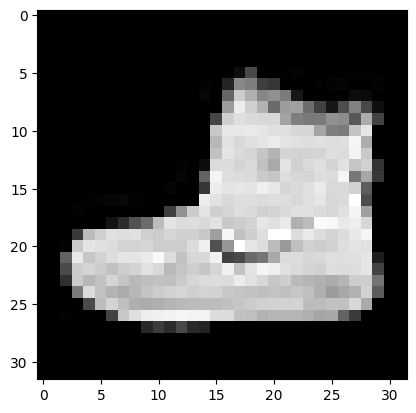

In [11]:
plt.imshow(x_train[0])

In [12]:
conv_base = VGG16(weights="imagenet", include_top=False, input_shape=input_shape)
conv_base.trainable = False

58889256/58889256 [==============================] - 1s 0us/step


In [13]:
model = keras.models.Sequential(
    [
        conv_base,
        keras.layers.Flatten(),
        keras.layers.Dense(200, activation='relu'),
        keras.layers.Dropout(rate=0.01),
        keras.layers.Dense(10, activation='softmax')
    ]
)

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 200)               102600    
                                                                 
 dropout (Dropout)           (None, 200)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                2010      
                                                                 
Total params: 14819298 (56.53 MB)
Trainable params: 104610 (408.63 KB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [15]:
model.compile(optimizer='adam',
              loss="categorical_crossentropy",
              metrics='accuracy',
)

In [16]:
model.fit(x=x_train,
          y=y_train,
          batch_size=64,
          epochs=8,
          validation_split=0.1,
)

Epoch 1/8
844/844 [==============================] - 750s 885ms/step - loss: 0.5902 - accuracy: 0.7921 - val_loss: 0.4676 - val_accuracy: 0.8287
Epoch 2/8
844/844 [==============================] - 750s 888ms/step - loss: 0.4281 - accuracy: 0.8426 - val_loss: 0.4058 - val_accuracy: 0.8547
Epoch 3/8
844/844 [==============================] - 748s 887ms/step - loss: 0.3874 - accuracy: 0.8579 - val_loss: 0.4007 - val_accuracy: 0.8583
Epoch 4/8
844/844 [==============================] - 747s 884ms/step - loss: 0.3666 - accuracy: 0.8648 - val_loss: 0.3791 - val_accuracy: 0.8598
Epoch 5/8
844/844 [==============================] - 738s 874ms/step - loss: 0.3471 - accuracy: 0.8721 - val_loss: 0.3693 - val_accuracy: 0.8685
Epoch 6/8
844/844 [==============================] - 745s 883ms/step - loss: 0.3356 - accuracy: 0.8759 - val_loss: 0.3650 - val_accuracy: 0.8695
Epoch 7/8
844/844 [==============================] - 748s 886ms/step - loss: 0.3227 - accuracy: 0.8808 - val_loss: 0.3450 - val_ac

In [17]:
model.evaluate(x=x_test,
  y=y_test,
  batch_size=None,
  return_dict=True)

313/313 [==============================] - 128s 408ms/step - loss: 0.3586 - accuracy: 0.8734


{'loss': 0.3585570156574249, 'accuracy': 0.8733999729156494}